In [1]:
# import of dependencies
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


In [2]:
# import of datasets 
df_user = pd.read_csv('csv/user_info.csv')
df_transaction = pd.read_csv('csv/transaction_info.csv')


#datasets preparation
#df_user
#drop_duplicates makes each row unique 
df_user = df_user.drop_duplicates(subset = ["user_id"])

#the column 'Unnamed: 0' is useless for our analysis
df_user = df_user.drop(['Unnamed: 0'], axis=1)
df_user.set_index('user_id', inplace=True)

#transformation from Timestamp to datetime object 
df_user['onboarding_completed_at'] = pd.to_datetime(df_user['onboarding_completed_at'])
#sorting by the 'onboarding_completed_at' to analyse through time
df_user = df_user.sort_values(by=['onboarding_completed_at'])

#df_transaction
#drop_duplicates makes each row unique
df_transaction = df_transaction.drop_duplicates(subset = ["transaction_id"])
#the column 'Unnamed: 0' is useless for our analysis
df_transaction = df_transaction.drop(['Unnamed: 0'], axis=1)

#Filling of the NaN values
df_user['is_fraud']=df_user['is_fraud'].fillna(False)
users = df_user.index.tolist()
for index, row in df_transaction.iterrows():
    if df_transaction.at[index,'user_id'] in users :
        #addition of a column from_fraud to df_transaction
        df_transaction.at[index,'from_fraud'] = (df_user.at[df_transaction.at[index,'user_id'], 'is_fraud'])

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

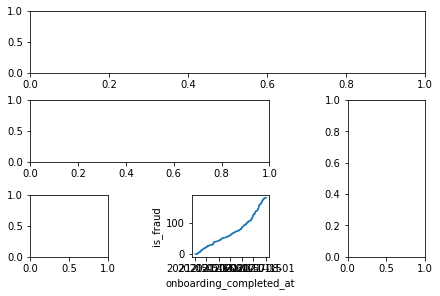

In [9]:
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(constrained_layout=True)

gs = GridSpec(3, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[1, :-1])
ax3 = fig.add_subplot(gs[1:, -1])
ax4 = fig.add_subplot(gs[-1, 0])
ax5 = fig.add_subplot(gs[-1, -2])
ax1.plot(sns.lineplot(x="onboarding_completed_at", y=df_user['is_fraud'].fillna(0).cumsum(),
             data=df_user))

fig.suptitle("GridSpec")
format_axes(fig)

plt.show()

<AxesSubplot:xlabel='onboarding_completed_at', ylabel='is_fraud'>

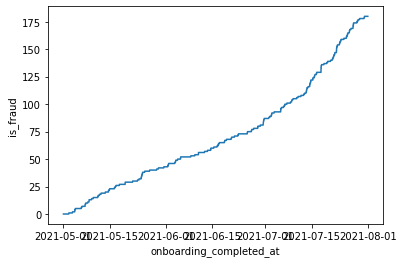